In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read data
data = pd.read_csv('data/HCV-Egy-Data.csv')

In [3]:
X = data.drop(['Baselinehistological staging'], axis=1)
y = data['Baselinehistological staging']
# Check distribution of target classes
y.value_counts()

Baselinehistological staging
4    362
3    355
1    336
2    332
Name: count, dtype: int64

In [4]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train

array([0, 0, 0, ..., 3, 0, 3])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neural_network import MLPClassifier

# Define and train neural network
model = MLPClassifier(hidden_layer_sizes=(20, 20), # Two hidden layers with 10 neurons each
                      activation='relu',           # 'tanh' works well for XOR
                      solver='adam',
                      learning_rate_init=0.01,
                      max_iter=10000,
                      random_state=42)

model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=10000, random_state=42)

In [8]:
# Predict on the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(X_test)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)

In [9]:
print('Accuracy:', accuracy)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.2996389891696751
F1 Score: 0.300388664494513
Precision: 0.30138453126516296
Recall: 0.2996389891696751
Confusion Matrix:
[[14 19 16 17]
 [20 23 17 13]
 [15 15 20 14]
 [19 19 10 26]]


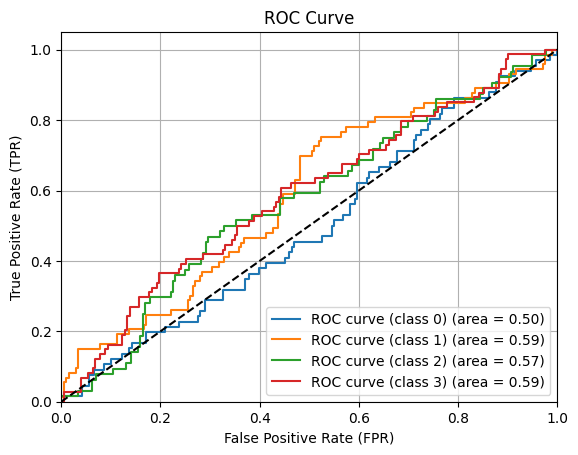

In [10]:
# Get class probabilities for the ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_probas = model.predict_proba(X_test)

# Plot the ROC curve for each class
n_classes = len(label_encoder.classes_)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], label = roc_curve(y_test == i, y_probas[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.grid()
plt.legend(loc='lower right')
plt.show()